# Load Data

In [1]:
import pandas as pd
data = pd.read_csv("data_bersih2.csv")
data

,id_tender,judul_tender,jenis_prosedur,jenis_pengadaan,jumlah_lot,jumlah_penawaran_terekam,tanggal_kontrak,tanggal_keputusan_pemenang,harga_estimasi,harga_penawaran,...,indikator_penawar_tunggal,indikator_prosedur_berisiko,durasi_penawaran,indikator_submisi_berisiko,durasi_keputusan,indikator_keputusan_berisiko,konsentrasi_instansi,skor_risiko_korupsi,ada_harga_penawaran,label
0,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,8/4/2021,7/14/2021,5.667410e+08,447099201.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.006925,0.201385,1.0,0
1,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,8/4/2021,7/14/2021,5.667410e+08,414476414.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.006420,0.201284,1.0,0
2,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,8/4/2021,7/14/2021,5.667410e+08,468840095.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.007262,0.201452,1.0,0
3,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,8/4/2021,7/14/2021,5.667410e+08,491176585.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.007608,0.201522,1.0,0
4,64a79b42-048e-4930-b016-85fdb8ca1268,BELANJA MODAL BANGUNAN PENGAMANAN SUNGAI,OPEN,WORKS,1.0,15.0,8/4/2021,7/14/2021,5.667410e+08,453392800.0,...,0.0,0.0,6.0,1.0,15.0,0.0,0.007022,0.201404,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99943,483ec7f4-7e94-42d7-be3b-a6efae245905,Belanj Modal Bangunan Pengambilan Air Bersih/A...,OPEN,WORKS,1.0,2.0,8/30/2021,8/24/2021,4.880000e+08,483657498.0,...,0.0,0.0,7.0,0.5,4.0,1.0,0.156619,0.331324,1.0,1
99944,999e2c46-17fc-4048-8503-68c4a5fc2fad,Survey Geofisik dan Geoteknik Spesifikasi: Spe...,OPEN,UNKNOWN,1.0,0.0,9/2/2021,8/20/2021,8.599953e+09,0.0,...,0.0,0.0,27.0,0.0,8.0,0.5,0.000000,0.125000,0.0,0
99945,e7016254-058a-45ef-bc89-b721085529af,Jasa Kebersihan April sampai dengan Desember T...,OPEN,SERVICES,1.0,0.0,4/30/2021,4/16/2021,3.357096e+09,0.0,...,0.0,0.0,8.0,0.5,7.0,0.5,0.000000,0.250000,0.0,0
99946,80eca440-9615-40df-99bc-4a24ddf60aa0,Revitalisasi SD Negeri Sidomulyo Kecamatan Pur...,OPEN,WORKS,1.0,1.0,7/20/2021,7/6/2021,2.815196e+08,278788000.0,...,0.0,0.0,12.0,0.0,7.0,0.5,0.005100,0.101020,1.0,0


# Menghitung Jumlah Data Per-Label

In [2]:
label_counts = data['label'].value_counts()

print("Jumlah data per label:")
print(label_counts)

Jumlah data per label:
label
0    88397
1    11551
Name: count, dtype: int64


# Pisahkan X dan Y

In [3]:
X = data.drop(columns=['skor_risiko_korupsi', 'indikator_penawar_tunggal', "indikator_prosedur_berisiko", "indikator_submisi_berisiko", "indikator_keputusan_berisiko", "konsentrasi_instansi", 'label'])  
y = data['label']                        

print("Ukuran X (fitur):", X.shape)
print("Ukuran y (label):", y.shape)

Ukuran X (fitur): (99948, 33)
Ukuran y (label): (99948,)


In [4]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99943    1
99944    0
99945    0
99946    0
99947    1
Name: label, Length: 99948, dtype: int64


# Membagi Train Test 

In [5]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y 
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])

Jumlah data latih: 79958
Jumlah data uji   : 19990


# Melakukan SMOTE untuk OverSampling

In [6]:
# 1. Cek kolom non-numerik
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Kolom non-numerik:", list(non_numeric_cols))

# 2. Drop kolom non-numerik dari data training sebelum SMOTE
X_train_num = X_train.drop(columns=non_numeric_cols)

# 3. Terapkan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_num, y_train)

# 4. Cek hasilnya
from collections import Counter
print("Distribusi label setelah SMOTE:", Counter(y_train_resampled))

Kolom non-numerik: ['id_tender', 'judul_tender', 'jenis_prosedur', 'jenis_pengadaan', 'tanggal_kontrak', 'tanggal_keputusan_pemenang', 'status_lot', 'nama_instansi', 'negara_instansi', 'id_penyedia', 'nama_penyedia', 'tipe_penyedia', 'penyedia_menang', 'sumber_data', 'id_lot', 'id_penawaran']
Distribusi label setelah SMOTE: Counter({0: 70717, 1: 70717})


In [7]:
X_train_num.head()

,jumlah_lot,jumlah_penawaran_terekam,harga_estimasi,harga_penawaran,jumlah_penawar,tahun_tender,harga_digiwhist,filter_instansi_valid,filter_penyedia_valid,filter_dibatalkan,filter_terbuka,filter_tahun_valid,filter_penawar_kalah,data_valid,durasi_penawaran,durasi_keputusan,ada_harga_penawaran
68894,1.0,6.0,3.399000e+08,3.349500e+08,84.0,2021.0,19017.0,1,1,1,1,1,0,0,12.0,15.0,1.0
42164,1.0,6.0,7.066925e+09,6.038653e+09,122.0,2021.0,331563.0,1,1,1,1,1,0,0,8.0,13.0,1.0
78270,1.0,6.0,8.660145e+08,6.952771e+08,47.0,2021.0,41419.0,1,1,1,1,1,0,0,5.0,18.0,1.0
24381,1.0,6.0,4.102889e+08,3.652716e+08,58.0,2021.0,20108.0,1,1,1,1,1,0,0,9.0,25.0,1.0
76601,1.0,27.0,2.551190e+08,1.987084e+08,114.0,2021.0,12309.0,1,1,1,1,1,0,0,10.0,18.0,1.0


# Random Forest Library

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1. Inisialisasi dan latih model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Hapus kolom non-numerik dari X_test agar sesuai dengan X_train_resampled
X_test_clean = X_test.drop(columns=non_numeric_cols)

# Coba prediksi ulang
y_pred = rf_model.predict(X_test_clean)


# 3. Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[17661    19]
 [   21  2289]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9989    0.9989     17680
           1     0.9918    0.9909    0.9913      2310

    accuracy                         0.9980     19990
   macro avg     0.9953    0.9949    0.9951     19990
weighted avg     0.9980    0.9980    0.9980     19990



# Manual Random Forest

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  
            X = X.values  
        if isinstance(y, pd.Series):  
            y = y.values  

        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))


        # Stpping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # Best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        if best_feature is None:  
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Buat child node
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # Information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        # Return None jika tak ada split yang valid
        if best_gain == 0:
            return None, None

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._entropy(y)

        # Create childern
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # hitung bobot avg. entropy of childern
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        if isinstance(X, pd.DataFrame):  
            X = X.values  
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=10, max_depth=5, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):  
            X = X.values  
        if isinstance(y, pd.Series):
            y = y.values 

        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

## Melakukan Undersampling

In [10]:
# 1. Gabungkan X dan y untuk mempermudah undersampling
data = pd.concat([X, pd.Series(y, name='label')], axis=1)

# 2. Pisahkan berdasarkan kelas
class_0 = data[data['label'] == 0]
class_1 = data[data['label'] == 1]

# 3. Undersample kelas mayoritas (kelas 0) sebanyak jumlah kelas minoritas
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# 4. Gabungkan kembali
data_balanced = pd.concat([class_0_undersampled, class_1], axis=0).sample(frac=1, random_state=42)  # acak data

# 5. Pisahkan kembali menjadi X dan y
X = data_balanced.drop(['id_tender', 'id_lot', 'id_penawaran', 'id_penyedia','nama_penyedia', 'judul_tender', 'nama_instansi','tanggal_kontrak', 'tanggal_keputusan_pemenang', "label"], axis=1)
y = data_balanced['label']


In [11]:
print(X.columns)

Index(['jenis_prosedur', 'jenis_pengadaan', 'jumlah_lot',
       'jumlah_penawaran_terekam', 'harga_estimasi', 'harga_penawaran',
       'status_lot', 'jumlah_penawar', 'negara_instansi', 'tipe_penyedia',
       'penyedia_menang', 'sumber_data', 'tahun_tender', 'harga_digiwhist',
       'filter_instansi_valid', 'filter_penyedia_valid', 'filter_dibatalkan',
       'filter_terbuka', 'filter_tahun_valid', 'filter_penawar_kalah',
       'data_valid', 'durasi_penawaran', 'durasi_keputusan',
       'ada_harga_penawaran'],
      dtype='object')


In [12]:
X.head()

,jenis_prosedur,jenis_pengadaan,jumlah_lot,jumlah_penawaran_terekam,harga_estimasi,harga_penawaran,status_lot,jumlah_penawar,negara_instansi,tipe_penyedia,...,filter_instansi_valid,filter_penyedia_valid,filter_dibatalkan,filter_terbuka,filter_tahun_valid,filter_penawar_kalah,data_valid,durasi_penawaran,durasi_keputusan,ada_harga_penawaran
91556,OPEN,WORKS,1.0,1.0,2.584892e+08,2.447910e+08,AWARDED,17.0,ID,supplier,...,1,1,1,1,1,1,1,6.0,4.0,1.0
33087,UNKNOWN,SERVICES,1.0,17.0,4.844950e+08,0.000000e+00,AWARDED,28.0,ID,supplier,...,1,1,1,1,1,0,0,30.0,4.0,0.0
95000,OPEN,WORKS,1.0,5.0,1.311927e+09,1.106577e+09,AWARDED,19.0,ID,supplier,...,1,1,1,1,1,0,0,6.0,7.0,1.0
22294,OPEN,SERVICES,1.0,54.0,1.585100e+08,0.000000e+00,AWARDED,67.0,ID,supplier,...,1,1,1,1,1,0,0,51.0,8.0,0.0
95926,OPEN,WORKS,1.0,4.0,2.280000e+09,1.961265e+09,AWARDED,36.0,ID,supplier,...,1,1,1,1,1,0,0,6.0,5.0,1.0


## Melakukan Label Encoding pada Data Kategorikal

In [13]:
from sklearn.preprocessing import LabelEncoder
# Deteksi kolom kategorikal (tipe objek/string)
col_kategorikal = X.select_dtypes(include=['object']).columns

# Jika ada kolom kategorikal, lakukan encoding
if len(col_kategorikal) > 0:
    for col in col_kategorikal:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        # Transform juga X_test agar konsisten (dengan caveat: label harus sama)
        if col in X_test.columns:
            X_test[col] = le.transform(X_test[col])

## Evaluasi

Akurasi: 0.9493616100411166
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      2302
           1       0.92      0.99      0.95      2319

    accuracy                           0.95      4621
   macro avg       0.95      0.95      0.95      4621
weighted avg       0.95      0.95      0.95      4621



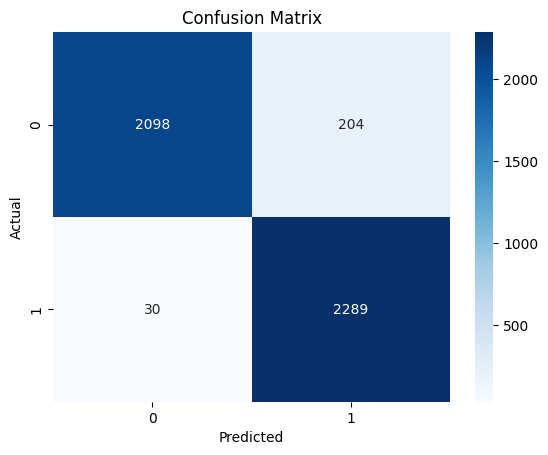

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Inisialisasi dan latih model
rf_manual = RandomForest(n_trees=5, max_depth=5, min_samples_split=2, n_feature=5)
rf_manual.fit(X_train, y_train)

# 6. Prediksi
y_pred = rf_manual.predict(X_test)

# 7. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
print("Jumlah kombinasi fitur unik:", X_train.drop_duplicates().shape[0])
print("Jumlah data latih:", X_train.shape[0])

Jumlah kombinasi fitur unik: 16342
Jumlah data latih: 18481


## Melakukan Pengecekan Pada Kesalahan Data atau Code 

In [16]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("Akurasi Dummy Model:", dummy.score(X_test, y_test))


Akurasi Dummy Model: 0.49816057130491237


In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Misalnya sebelum PCA, dan setelah X, y dibentuk
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train_resampled, y_train_resampled)

# SVM Library

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[12722  1400]
 [  443 13722]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     14122
           1       0.91      0.97      0.94     14165

    accuracy                           0.93     28287
   macro avg       0.94      0.93      0.93     28287
weighted avg       0.94      0.93      0.93     28287

Accuracy Score: 0.9348463958708948


# Manual SVM

In [33]:
import numpy as np
import random

class SVM:
    def __init__(self, max_iter=1000, C=1.0, tol=0.001):
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.b = 0
        self.w = None

    def fit(self, X, y):
        # konversi ke numpy
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=int)

        n_data, n_fitur = X.shape

        # inisialisasi alpha semua nol
        alpha = np.zeros(n_data)
        self.w = np.zeros(n_fitur)
        b = 0

        # loop training
        for step in range(self.max_iter):
            alpha_lama = alpha.copy()
            for i in range(n_data):
                # pilih acak j ≠ i
                j = i
                while j == i:
                    j = random.randint(0, n_data - 1)

                x_i = X[i]
                x_j = X[j]
                y_i = y[i]
                y_j = y[j]

                # hitung eta = ||xi - xj||^2
                eta = np.dot(x_i, x_i) + np.dot(x_j, x_j) - 2 * np.dot(x_i, x_j)
                if eta == 0:
                    continue

                # hitung prediksi error
                fxi = np.dot(self.w, x_i) + b
                fxj = np.dot(self.w, x_j) + b
                Ei = fxi - y_i
                Ej = fxj - y_j

                # hitung batas L dan H
                if y_i != y_j:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(self.C, self.C + alpha[j] - alpha[i])
                else:
                    L = max(0, alpha[i] + alpha[j] - self.C)
                    H = min(self.C, alpha[i] + alpha[j])

                if L == H:
                    continue

                # hitung alpha baru
                alpha_j_new = alpha[j] + y_j * (Ei - Ej) / eta

                # klip alpha_j agar tetap di dalam [L, H]
                if alpha_j_new > H:
                    alpha_j_new = H
                elif alpha_j_new < L:
                    alpha_j_new = L

                alpha_i_new = alpha[i] + y_i * y_j * (alpha[j] - alpha_j_new)

                # delta perubahan
                delta_i = alpha_i_new - alpha[i]
                delta_j = alpha_j_new - alpha[j]

                # update w
                self.w = self.w + delta_i * y_i * x_i + delta_j * y_j * x_j

                # update b (bias)
                b1 = b - Ei - y_i * delta_i * np.dot(x_i, x_i) - y_j * delta_j * np.dot(x_i, x_j)
                b2 = b - Ej - y_i * delta_i * np.dot(x_i, x_j) - y_j * delta_j * np.dot(x_j, x_j)

                if 0 < alpha_i_new < self.C:
                    b = b1
                elif 0 < alpha_j_new < self.C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

                # simpan nilai alpha baru
                alpha[i] = alpha_i_new
                alpha[j] = alpha_j_new

            # cek konvergen (norma perubahan kecil)
            perubahan = np.linalg.norm(alpha - alpha_lama)
            if perubahan < self.tol:
                break

        self.b = b

    def predict(self, X):
        X = np.array(X, dtype=float)
        hasil = np.dot(X, self.w) + self.b
        return np.sign(hasil).astype(int)

Akurasi: 0.6203556404001839
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.76      0.35      0.48     14122
           1       0.58      0.89      0.70     14165

    accuracy                           0.62     28287
   macro avg       0.67      0.62      0.59     28287
weighted avg       0.67      0.62      0.59     28287



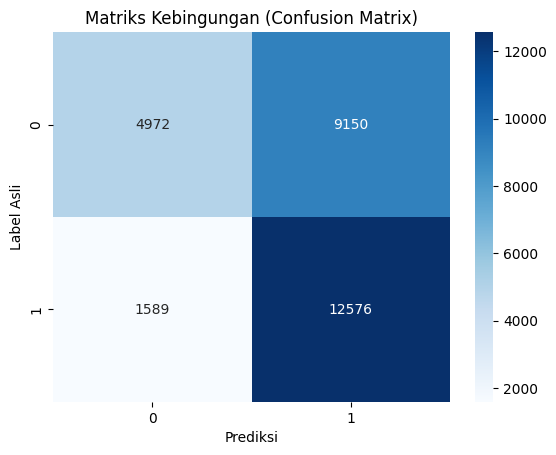

In [34]:
# Import modul yang dibutuhkan
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah label dari 0 menjadi -1 secara manual
y_train_svm = []
for label in y_train:
    if label == 0:
        y_train_svm.append(-1)
    else:
        y_train_svm.append(1)

y_test_svm = []
for label in y_test:
    if label == 0:
        y_test_svm.append(-1)
    else:
        y_test_svm.append(1)

# Latih model dengan data training
svm = SVM(max_iter=500, C=5)
svm.fit(X_train, y_train_svm)

# Prediksi data uji
y_pred = svm.predict(X_test)

# Ubah hasil prediksi ke format 0-1
y_pred_bin = []
for p in y_pred:
    if p == -1:
        y_pred_bin.append(0)
    else:
        y_pred_bin.append(1)

# Ubah label asli juga ke 0-1
y_true_bin = []
for t in y_test_svm:
    if t == -1:
        y_true_bin.append(0)
    else:
        y_true_bin.append(1)

# Evaluasi akurasi dan metrik lainnya
print("Akurasi:", accuracy_score(y_true_bin, y_pred_bin))
print("Laporan Klasifikasi:\n", classification_report(y_true_bin, y_pred_bin))

# Tampilkan confusion matrix
cm = confusion_matrix(y_true_bin, y_pred_bin)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Label Asli")
plt.title("Matriks Kebingungan (Confusion Matrix)")
plt.show()

# Cek untuk contoh inputan

In [ ]:
print(X.columns)


Index(['jenis_prosedur', 'jenis_pengadaan', 'jumlah_lot',
       'jumlah_penawaran_terekam', 'harga_estimasi', 'harga_penawaran',
       'status_lot', 'jumlah_penawar', 'negara_instansi', 'tipe_penyedia',
       'penyedia_menang', 'sumber_data', 'tahun_tender', 'harga_digiwhist',
       'filter_instansi_valid', 'filter_penyedia_valid', 'filter_dibatalkan',
       'filter_terbuka', 'filter_tahun_valid', 'filter_penawar_kalah',
       'data_valid', 'durasi_penawaran', 'durasi_keputusan',
       'ada_harga_penawaran'],
      dtype='object')


In [ ]:
X.head(10)

,jenis_prosedur,jenis_pengadaan,jumlah_lot,jumlah_penawaran_terekam,harga_estimasi,harga_penawaran,status_lot,jumlah_penawar,negara_instansi,tipe_penyedia,...,filter_instansi_valid,filter_penyedia_valid,filter_dibatalkan,filter_terbuka,filter_tahun_valid,filter_penawar_kalah,data_valid,durasi_penawaran,durasi_keputusan,ada_harga_penawaran
91556,0,4,1.0,1.0,2.584892e+08,2.447910e+08,0,17.0,0,1,...,1,1,1,1,1,1,1,6.0,4.0,1.0
33087,3,1,1.0,17.0,4.844950e+08,0.000000e+00,0,28.0,0,1,...,1,1,1,1,1,0,0,30.0,4.0,0.0
95000,0,4,1.0,5.0,1.311927e+09,1.106577e+09,0,19.0,0,1,...,1,1,1,1,1,0,0,6.0,7.0,1.0
22294,0,1,1.0,54.0,1.585100e+08,0.000000e+00,0,67.0,0,1,...,1,1,1,1,1,0,0,51.0,8.0,0.0
95926,0,4,1.0,4.0,2.280000e+09,1.961265e+09,0,36.0,0,1,...,1,1,1,1,1,0,0,6.0,5.0,1.0
48875,0,1,1.0,3.0,1.559800e+09,1.558700e+09,0,30.0,0,1,...,1,1,1,1,1,0,0,6.0,3.0,1.0
78897,0,4,1.0,3.0,1.495727e+09,1.196582e+09,0,47.0,0,1,...,1,1,1,1,1,1,1,6.0,12.0,1.0
66987,0,4,1.0,0.0,4.079150e+08,0.000000e+00,0,18.0,0,0,...,1,0,1,1,1,0,0,5.0,10.0,0.0
60953,0,4,1.0,6.0,1.007229e+09,9.740135e+08,0,63.0,0,1,...,1,1,1,1,1,1,1,6.0,8.0,1.0
73815,0,2,1.0,4.0,3.064217e+09,3.052151e+09,0,70.0,0,1,...,1,1,1,1,1,0,0,6.0,8.0,1.0


In [ ]:
print(X.iloc[:, :12].head())  


       jenis_prosedur  jenis_pengadaan  jumlah_lot  jumlah_penawaran_terekam  \
91556               0                4         1.0                       1.0   
33087               3                1         1.0                      17.0   
95000               0                4         1.0                       5.0   
22294               0                1         1.0                      54.0   
95926               0                4         1.0                       4.0   

       harga_estimasi  harga_penawaran  status_lot  jumlah_penawar  \
91556    2.584892e+08     2.447910e+08           0            17.0   
33087    4.844950e+08     0.000000e+00           0            28.0   
95000    1.311927e+09     1.106577e+09           0            19.0   
22294    1.585100e+08     0.000000e+00           0            67.0   
95926    2.280000e+09     1.961265e+09           0            36.0   

       negara_instansi  tipe_penyedia  penyedia_menang  sumber_data  
91556                0      

In [ ]:
print(X.iloc[:, 12:24].head())  

       tahun_tender  harga_digiwhist  filter_instansi_valid  \
91556        2021.0          14227.0                      1   
33087        2021.0          26559.0                      1   
95000        2021.0          76537.0                      1   
22294        2021.0           8774.0                      1   
95926        2021.0         117519.0                      1   

       filter_penyedia_valid  filter_dibatalkan  filter_terbuka  \
91556                      1                  1               1   
33087                      1                  1               1   
95000                      1                  1               1   
22294                      1                  1               1   
95926                      1                  1               1   

       filter_tahun_valid  filter_penawar_kalah  data_valid  durasi_penawaran  \
91556                   1                     1           1               6.0   
33087                   1                     0         

In [ ]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
